Csp from CV :  53.292927355442146


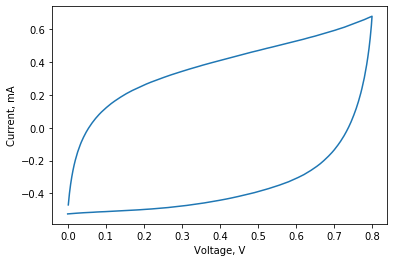

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# import the file
data = pd.read_csv('[P2-7] total test at day32 -Resin_02_CV.mpt', header=52, sep = "\t")
cycle = 5
mass = 0.001371
scan_rate = 20
Vmax = 0.8

# column and row filtering & export
data = data[data['cycle number'] == cycle+1]
data = data[['Ewe/V','<I>/mA']]
data.to_csv('CV_filtered.csv', index=False, header=False)

# plot
plt.plot(data['Ewe/V'],data['<I>/mA'])
plt.xlabel('Voltage, V')
plt.ylabel('Current, mA')

# VI area calculation & Csp calculation
data['delta_x'] = data['Ewe/V'].diff()
data['segment_area'] = data['delta_x'] * data['<I>/mA']
VI_area = data['segment_area'].sum(axis=0)
C_sp = 4 * 0.5 * VI_area / mass / scan_rate / Vmax
print('Csp from CV : ', C_sp)
